# Лабораторна робота №12. Об'єктно-орієнтоване програмування. Частина ІІ. Звіт

__Мета:__ _навчитися програмувати в стилі об'єектно-орієнтованого програмування._

::: callout-note
## Примітка
У лабораторній роботі використано матеріали [python institute.](https://pythoninstitute.org/pcep)
:::

#### Що ви будете вміти?
* створювати класи та об'єкти у Python;
* реалізувати механізми інкапсуляції та наслідування;
* визначати та використовувати змінні екземпляра;
* визначати та використовувати методи;
* використовувати композицію.

## Основи об'єктно-орієнтованого програмування на Python. Метод __str()__

### Приклад 1

Нам потрібен клас, що вміє рахувати секунди. Чи легко? Це не так просто, як Ви думаєте, оскільки ми матимемо певні вимоги.

Прочитайте їх уважно, оскільки клас, який Ви пишете, використовуватиметься для запуску ракет, які виконують міжнародні місії на Марс. Це велика відповідальність. Ми розраховуємо на Вас!

Ваш клас буде називатися `Timer`. Його конструктор приймає три аргументи, що представляють годинник (значення з діапазону [0..23] - ми будемо використовувати воєнний час), хвилини (з діапазону [0..59]) та секунди (з діапазону [0..59]).

Нуль -- це значення за замовчанням всіх вищеперелічених параметрів. Немає необхідності виконувати будь-які перевірки.

Сам клас має забезпечувати такі можливості:

* об'єкти класу повинні бути "друкованими", тобто вони повинні мати можливість неявно перетворювати себе на рядки наступного виду: "чч:мм:сс" з додаванням провідних нулів, коли будь-яке з значень менше 10;
* клас повинен бути оснащений методами без параметрів, званими next_second() і previous_second(), що збільшують час, що зберігається всередині об'єктів, на +1/-1 секунд відповідно.

Використовуйте такі підказки:

* всі властивості об'єкта мають бути закритими;
* розгляньте можливість написання окремої функції (не методу!) для форматування рядка часу.

Доповніть шаблон, який ми надали в редакторі. Запустіть свій код і перевірте, чи виглядає результат так само, як наш.

Очікуваний вивід:  

`23:59:59`  
`00:00:00`  
`23:59:59  `  

In [4]:
class Timer:
    def __init__(self, hours=0, minutes=0, seconds=0):
        self._hours = hours
        self._minutes = minutes
        self._seconds = seconds

    def __str__(self):
        return f"{self._format_time(self._hours)}:{self._format_time(self._minutes)}:{self._format_time(self._seconds)}"

    def _format_time(self, time):
        return str(time).zfill(2)

    def next_second(self):
        self._seconds += 1
        if self._seconds == 60:
            self._seconds = 0
            self._minutes += 1
            if self._minutes == 60:
                self._minutes = 0
                self._hours += 1
                if self._hours == 24:
                    self._hours = 0

    def prev_second(self):
        self._seconds -= 1
        if self._seconds == -1:
            self._seconds = 59
            self._minutes -= 1
            if self._minutes == -1:
                self._minutes = 59
                self._hours -= 1
                if self._hours == -1:
                    self._hours = 23


timer = Timer(23, 59, 59)
print(timer)
timer.next_second()
print(timer)
timer.prev_second()
print(timer)

23:59:59
00:00:00
23:59:59


### Приклад 2

Ваше завдання – реалізувати клас під назвою `Weeker`. Так, Ваші очі не обманюють Вас -- ця назва походить від того факту, що об'єкти цього класу можуть зберігати та керувати днями тижня.

Конструктор класу приймає один аргумент – рядок. Рядок є назвою дня тижня, і єдині допустимі значення повинні надходити з наступного набору:

`Mon Tue Wed Thu Fri Sat Sun`

Виклик конструктора з аргументом ззовні цього набору повинен викликати виняток `WeekDayError` (визначте його самостійно; не турбуйтеся, скоро ми поговоримо про об'єктивну природу винятків). Клас повинен надати такі можливості:

об'єкти класу мають бути "друкованими", тобто. вони повинні мати можливість неявно перетворювати себе на рядки тієї ж форми, що й аргументи конструктора;
клас повинен бути оснащений однопараметричними методами з іменами `add_days(n)` і `subtract_days(n)`, де __n__ є цілим числом число та оновлення дня тижня, що зберігається всередині об'єкта, таким чином, щоб відобразити зміну дати на вказану кількість днів уперед або назад.
всі властивості об'єкта мають бути прихованими;
Заповніть шаблон, який ми надали в редакторі, запустіть свій код і перевірте, чи виглядає Ваш результат так само, як наш.

Очікуваний вивід: 

`Mon`  
`Thu`  
`Sun`  
`Sorry, I can't serve your request.  `


In [6]:
class WeekDayError(Exception):
    pass


class Weeker:
    DAYS = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

    def __init__(self, day):
        if day not in self.DAYS:
            raise WeekDayError
        self._day = day

    def __str__(self):
        return self._day

    def add_days(self, n):
        current_index = self.DAYS.index(self._day)
        new_index = (current_index + n) % 7
        self._day = self.DAYS[new_index]

    def subtract_days(self, n):
        current_index = self.DAYS.index(self._day)
        new_index = (current_index - n) % 7
        self._day = self.DAYS[new_index]


try:
    weekday = Weeker('Mon')
    print(weekday)
    weekday.add_days(15)
    print(weekday)
    weekday.subtract_days(23)
    print(weekday)
    weekday = Weeker('Monday')
except WeekDayError:
    print("Sorry, I can't serve your request.")

Mon
Tue
Sun
Sorry, I can't serve your request.


### Приклад 3
Давайте відвідаємо зовсім особливе місце – площину з декартовою системою координат (Ви можете дізнатися більше про цю концепцію тут: [Декартова система координат)](https://uk.wikipedia.org/wiki/%D0%94%D0%B5%D0%BA%D0%B0%D1%80%D1%82%D0%BE%D0%B2%D0%B0_%D1%81%D0%B8%D1%81%D1%82%D0%B5%D0%BC%D0%B0_%D0%BA%D0%BE%D0%BE%D1%80%D0%B4%D0%B8%D0%BD%D0%B0%D1%82).

Кожну точку, розташовану на площині, можна описати як пару координат, яку зазвичай називають $x$ і $y$. Ми хочемо, щоб Ви написали клас Python, який зберігає обидві координати як числа з плаваючою комою. Більше того, ми хочемо, щоб об'єкти цього класу вважали відстані між будь-якою з двох точок, розташованих на площині.

Завдання досить просте, якщо Ви скористаєтеся функцією з ім'ям `hypot()` (доступна в модулі `math`), яка вважає довжину гіпотенузи прямокутного трикутника (докладніше тут: [Гіпотенуза](https://uk.wikipedia.org/wiki/%D0%93%D1%96%D0%BF%D0%BE%D1%82%D0%B5%D0%BD%D1%83%D0%B7%D0%B0)) і тут: [Trigonometric functions](https://docs.python.org/3.7/library/math.html#trigonometric-functions).

Ось як ми уявляємо собі клас:

* він називається `Point`;
* його конструктор приймає два аргументи (x і y відповідно), обидва з яких за умовчанням дорівнюють нулю;
* всі властивості мають бути прихованими;
* клас містить два методи без параметрів, названі `getx()` та `gety()`, які повертають кожну з двох координат (координати зберігаються приховано, тому вони не можуть бути доступні безпосередньо з об'єкта);
* клас надає метод під назвою `distance_from_xy(x, y)`, який обчислює та повертає відстань між точкою, що зберігається всередині об'єкта, та іншою точкою, заданою як пара пунктів;
* клас надає метод під назвою `distance_from_point(point)`, який обчислює відстань (як у попередньому методі), але місце розташування іншої точки задається як інший об'єкт класу `Point`;

Доповніть шаблон, який ми надали в редакторі, запустіть свій код і перевірте, чи виглядає Ваш результат так само, як наш.

Очікуваний вивід: 

`1.4142135623730951`  
`1.4142135623730951`

In [10]:
import math


class Point:
    def __init__(self, x=0.0, y=0.0):
        self._x = x
        self._y = y

    def getx(self):
        return self._x

    def gety(self):
        return self._y

    def distance_from_xy(self, x, y):
        return math.hypot(self._x - x, self._y - y)

    def distance_from_point(self, point):
        return self.distance_from_xy(point.getx(), point.gety())


point1 = Point(0, 0)
point2 = Point(1, 1)
print(point1.distance_from_point(point2))
print(point2.distance_from_xy(2, 0))

1.4142135623730951
1.4142135623730951


## Використання композиції

### Завдання 1

Тепер ми збираємося вбудувати клас `Point` (див. попереднє завдання) в інший клас. Крім того, ми збираємося помістити три точки в один клас, що дозволить нам визначити трикутник. Як ми можемо це зробити?

Новий клас буде називатися `Triangle`, і ось, що нам потрібно:

* конструктор приймає три аргументи -- вони є об'єктами класу `Point`;
* точки зберігаються всередині об'єкта як список;
* клас надає метод без параметрів з назвою `perimeter()`, який обчислює периметр трикутника, описаного трьома точками; периметр – це сума довжин усіх сторін (це просто нагадування, хоча ми впевнені, що Ви самі це чудово знаєте).

Доповніть шаблон, який ми надали в редакторі. Запустіть свій код і перевірте, чи збігається оцінюваний периметр з нашим.

Нижче Ви можете скопіювати код класу `Point`, який ми використовували у попередній лабораторній роботі:

In [12]:
class Point:
    def __init__(self, x=0.0, y=0.0):
        self.__x = x
        self.__y = y

Очікуваний вивод:  

`3.414213562373095`


In [17]:
import math


class Point:
    def __init__(self, x=0.0, y=0.0):
        self.__x = x
        self.__y = y

    @property
    def x(self):
        return self.__x

    @property
    def y(self):
        return self.__y


class Triangle:
    def __init__(self, vertice1, vertice2, vertice3):
        self.__vertices = [vertice1, vertice2, vertice3]

    def perimeter(self):
        side1 = math.sqrt((self.__vertices[1].x - self.__vertices[0].x) ** 2 + (self.__vertices[1].y - self.__vertices[0].y) ** 2)
        side2 = math.sqrt((self.__vertices[2].x - self.__vertices[1].x) ** 2 + (self.__vertices[2].y - self.__vertices[1].y) ** 2)
        side3 = math.sqrt((self.__vertices[0].x - self.__vertices[2].x) ** 2 + (self.__vertices[0].y - self.__vertices[2].y) ** 2)
        return side1 + side2 + side3


triangle = Triangle(Point(0, 0), Point(1, 0), Point(0, 1))
print(triangle.perimeter())


Цей код включає клас `Poin`t з попереднього завдання, а також додає клас `Triangle`, який містить конструктор для приймання трьох вершин трикутника і метод `perimeter`, що обчислює периметр трикутника, використовуючи відстані між вершинами.

### Завдання для самостіної роботи

1. Виконати приклади 1-3 і завдання 1, наведені вище у цьому зошиті.

1. Створити файл __lab_12_StudentLastName.py__ з написаним кодом. 

1. Закомітити файл у локальний репозиторій.

1. Відправити ("запушити") поточну версію Git-проєкта у віддалений репозиторій на GitHub.

1. Звіт має складатися з файлу (за основу взяти __цей Python-зошит__)  `lab_12_StudentLastName.ipynb`. (Можливі якісь додакові файли)

### Контрольні запитання

Припустимо, що наступний фрагмент коду успішно виконано:

In [16]:
class Dog: 
    kennel = 0 
    def __init__(self, breed): 
        self.breed = breed 
        Dog.kennel += 1 

    def __str__(self): 
        return self.breed + " says: Woof!" 


class SheepDog(Dog): 
    def __str__(self): 
        return super().__str__() + " Don't run away, Little Lamb!" 


class GuardDog(Dog): 
     def __str__(self): 
         return super().__str__() + " Stay where you are, Mister Intruder!" 

rocky = SheepDog("Collie") 
luna = GuardDog("Dobermann") 

1. Який очікуваний вивід наступного фрагмента коду?

`print(rocky)`  
`print(luna)`

Вивід:

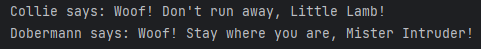

2. Який очікуваний вивід наступного фрагмента коду?

`print(issubclass(SheepDog, Dog), issubclass(SheepDog, GuardDog))`   
`print(isinstance(rocky, GuardDog), isinstance(luna, GuardDog))`

Вивід:

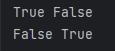

### References

1. [Anaconda (Python distribution)](https://uk.wikipedia.org/wiki/Anaconda_(Python_distribution))  
1. [Conda](https://conda.io/en/latest/)  
1. [Pro Git Book](https://git-scm.com/book/en/v2)  
1. [OpenEDG Python Institute](https://pythoninstitute.org/)  
1. [Cisco. Networking Academy](https://www.netacad.com/)  
1. [Научно-издательская система Quarto](https://data-visualization-blog.netlify.app/posts/quarto/)
1. [The Python Standard Library](https://docs.python.org/3/library/index.html)
1. [Callout Blocks. Markdown Syntax](https://quarto.org/docs/authoring/callouts.html)  
1. [5. Built-in Exceptions](https://docs.python.org/3.6/library/exceptions.html)
1. [Принцип єдиної відповідальності](https://uk.wikipedia.org/wiki/%D0%9F%D1%80%D0%B8%D0%BD%D1%86%D0%B8%D0%BF_%D1%94%D0%B4%D0%B8%D0%BD%D0%BE%D1%97_%D0%B2%D1%96%D0%B4%D0%BF%D0%BE%D0%B2%D1%96%D0%B4%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D1%96)
